# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import seaborn as sb

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee["Salary"].mean()

48.888888888888886

In [4]:
# Method 2
# your answer here
employee.pivot_table(index=['Department'], aggfunc = {'Salary': 'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
employee.pivot_table(index= 'Department', columns ='Title',  aggfunc = {'Salary': 'mean'})

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index= ['Department','Years'], columns ='Title',  aggfunc = {'Salary': 'mean'})

Salary                  
Title                VP analyst associate
Department Years                         
HR         2        NaN    30.0       NaN
           4        NaN    35.0       NaN
           8       70.0     NaN       NaN
IT         1        NaN    35.0       NaN
           2        NaN    30.0       NaN
           7        NaN     NaN      60.0
           8       70.0     NaN       NaN
Sales      2        NaN     NaN      55.0
           3        NaN     NaN      55.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee.pivot_table(index= ['Department'], columns ='Title',  aggfunc = {'Salary': 'mean', 'Name':'count'})

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
employee_results = employee.pivot_table(index= ['Department', 'Title'],  aggfunc = {'Salary' : ['median', 'min','max', 'std']})

employee_results

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
# your answer here

#the NaN standard deviation values are zeros since the max-median-min are the same


employee_results.fillna(0)

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0  0.000000
Sales      associate   55.0   55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
stakeholder = employee.pivot_table(index= 'Department', aggfunc = {'Salary': 'sum', 'Name':'count'})
stakeholder.rename(columns={"Name": "Number of Employees", "Salary" : "Total Spent on Salaries"})

,Number of Employees,Total Spent on Salaries
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
# your answer here
years_avg_salary = employee.pivot_table(index= ['Department','Title'],  aggfunc = {'Years': 'sum','Salary': 'mean'})

years_avg_salary.rename(columns={"Salary": "Mean Salary", "Years" : "Work Experience (years)"})

Mean Salary  Work Experience (years)
Department Title                                          
HR         VP                70.0                        8
           analyst           32.5                        6
IT         VP                70.0                        8
           analyst           32.5                        3
           associate         60.0                        7
Sales      associate         55.0                        5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [15]:
#Data Types:

fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.3+ KB


In [16]:
#Descriptive Statistics

fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
# your answer here
correlation_mva_steps = fitbit[['Minutes Very Active','Steps']].corr()
correlation_mva_steps

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

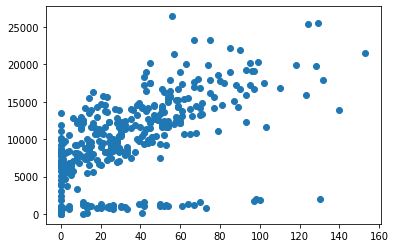

In [19]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [21]:
# your answer here

'''We detect a possible correlation in the positive direction but there are some clear outliers, particularly around the zero values for the Steps variable which might indicate that the biometrics tracker is measures other activities other than walking'''



'We detect a possible correlation in the positive direction but there are some clear outliers, particularly around the zero values for the Steps variable which might indicate that the biometrics tracker is measures other activities other than walking'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here
correlation_msed_steps = fitbit[['Minutes Sedentary','Steps']].corr()
correlation_msed_steps

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

'The computed correlation has a value of 0.077 which indicates a weak relationship between both variables. The plot confirms the computed correlation results.'

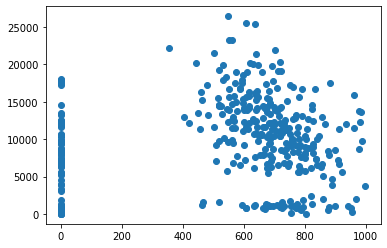

In [24]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

'''The computed correlation has a value of 0.077 which indicates a weak relationship between both variables. The plot confirms the computed correlation results.'''

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
correlation_msleep_steps = fitbit[['MinutesOfSleep','Steps']].corr()
correlation_msleep_steps

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

'Similar to the previous example, the correlation value is very close to 0 which indicates a weak relationship between both variables. The plot confirms the computed correlation results.'

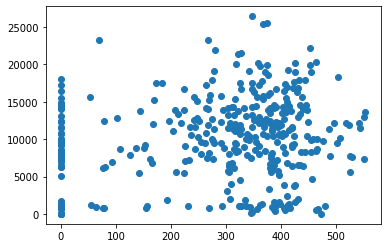

In [27]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
'''Similar to the previous example, the correlation value is very close to 0 which indicates a weak relationship between both variables. The plot confirms the computed correlation results.'''


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [33]:
# your answer here
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


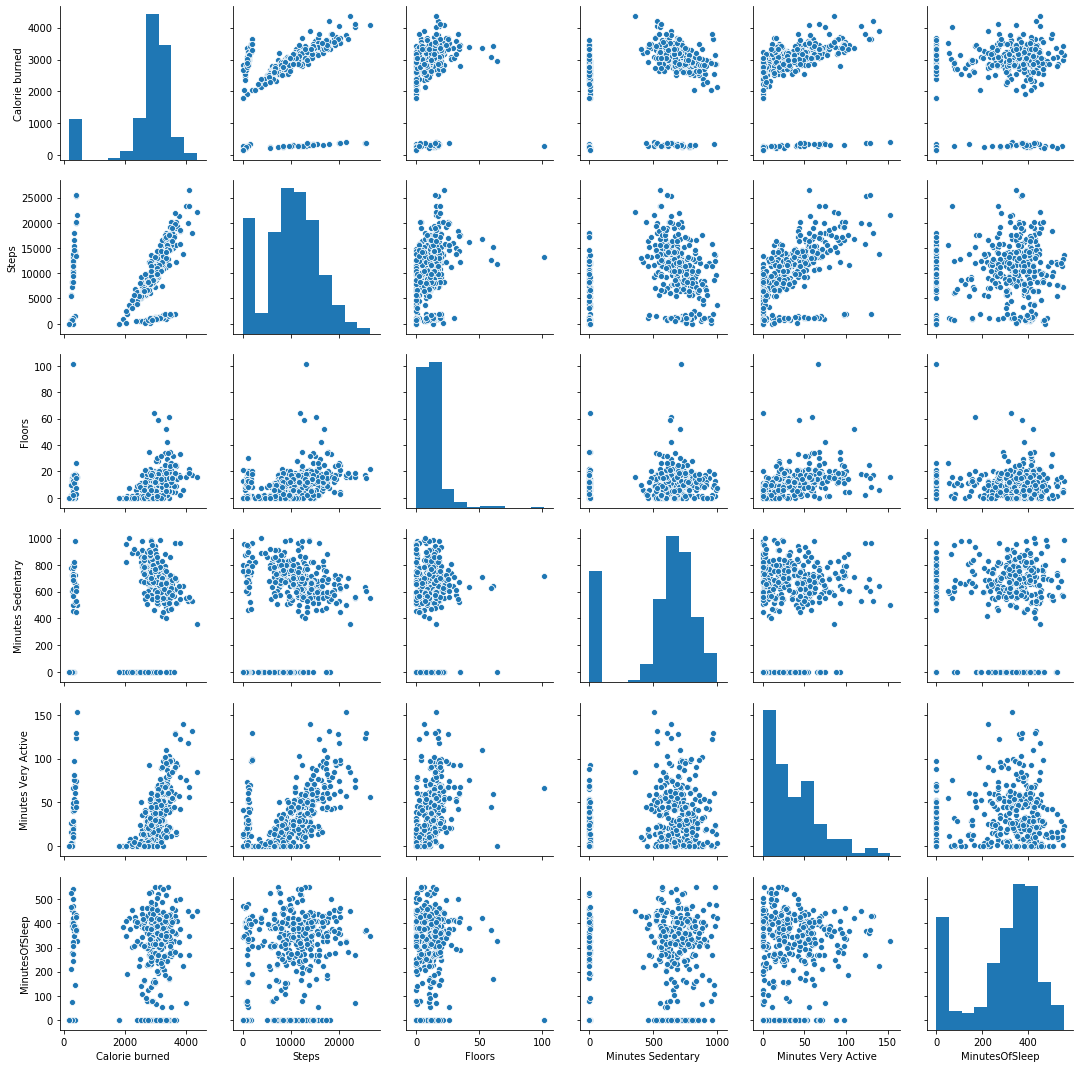

In [32]:
import seaborn as sb

sb.pairplot(fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']])

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [35]:
# your answer her
a = cor_fit['Steps'].sort_values(ascending = False)
a

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

In [36]:
'''There is not a clear strong correlation between Steps and any other variable, the closest candidate is Minutes Very Active'''

'There is not a clear strong correlation between Steps and any other variable, the closest candidate is Minutes Very Active'

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [38]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

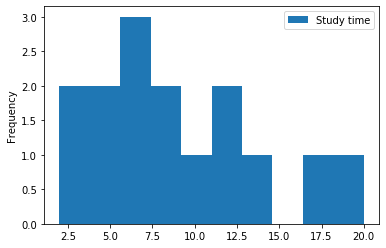

In [40]:
# your answer here
time_grades.plot( x='Study time', y='Grade', kind='hist')

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [45]:
# Pearson

time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [46]:
#Spearman

time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
'''There is a strong correlation between the two values considering that any value over 0.7 as an indicator'''

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

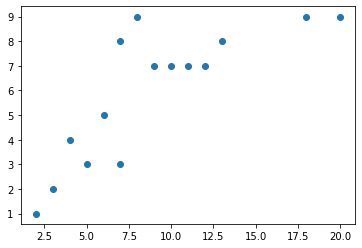

In [47]:
# your answer here

plt.scatter(time_grades['Study time'],time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
'''Though Pearson's value is high and indicative of a possible linear relation, Spearman's is a bit higher indicating a stronger monotonic relation.
The plot does visually indicate a possible inverse exponential curve fit.
'''